In [ ]:
# from keras.datasets import mnist
# (train_X, train_y), (test_X, test_y) = mnist.load_data()
# print('X_train: ' + str(train_X.shape))
# print('Y_train: ' + str(train_y.shape))
# print('X_test:  '  + str(test_X.shape))
# print('Y_test:  '  + str(test_y.shape))

In [ ]:
# from matplotlib import pyplot
# for i in range(9):
#   pyplot.subplot(330 + 1 + i)
#   pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
#   pyplot.show()

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 6s - 18ms/step - accuracy: 0.9208 - loss: 0.2826 - val_accuracy: 0.9607 - val_loss: 0.1417
Epoch 2/10
300/300 - 4s - 15ms/step - accuracy: 0.9670 - loss: 0.1115 - val_accuracy: 0.9706 - val_loss: 0.0972
Epoch 3/10
300/300 - 5s - 17ms/step - accuracy: 0.9794 - loss: 0.0718 - val_accuracy: 0.9774 - val_loss: 0.0775
Epoch 4/10
300/300 - 5s - 16ms/step - accuracy: 0.9858 - loss: 0.0501 - val_accuracy: 0.9803 - val_loss: 0.0651
Epoch 5/10
300/300 - 5s - 15ms/step - accuracy: 0.9900 - loss: 0.0366 - val_accuracy: 0.9793 - val_loss: 0.0662
Epoch 6/10
300/300 - 5s - 15ms/step - accuracy: 0.9924 - loss: 0.0275 - val_accuracy: 0.9810 - val_loss: 0.0617
Epoch 7/10
300/300 - 5s - 17ms/step - accuracy: 0.9947 - loss: 0.0204 - val_accuracy: 0.9798 - val_loss: 0.0599
Epoch 8/10
300/300 - 5s - 17ms/step - accuracy: 0.9964 - loss: 0.0150 - val_accuracy: 0.9798 - val_loss: 0.0656
Epoch 9/10
300/300 - 6s - 18ms/step - accuracy: 0.9978 - loss: 0.0109 - val_accuracy: 0.9806 - val_loss:

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.75%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


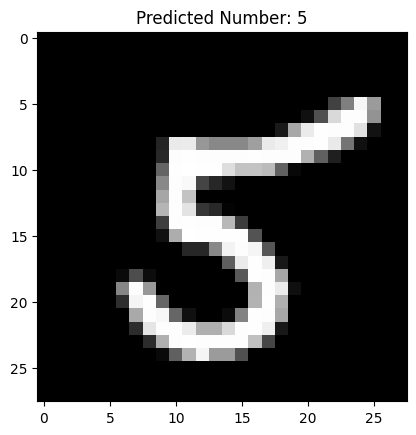

In [ ]:
image_index = np.random.randint(0, len(X_test))
image = X_test[image_index]

image = image.reshape(1, 784)

prediction = model.predict(image)

predicted_class = np.argmax(prediction)

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Number: {predicted_class}")
plt.show()

Enter an image index between 0 and 9999: 235
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


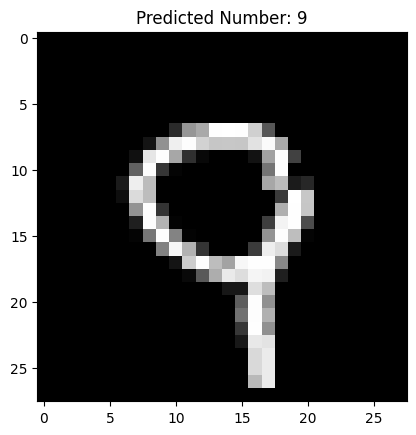

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

while True:
    try:
        image_index = int(input("Enter an image index between 0 and {}: ".format(len(X_test) - 1)))
        if 0 <= image_index < len(X_test):
            break
        else:
            print("Invalid index. Please enter a number within the range.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

image = X_test[image_index]
image = image.reshape(1, 784)

prediction = model.predict(image)
predicted_class = np.argmax(prediction)

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Number: {predicted_class}")
plt.show()